<font size = "5"> **[Diffraction Tools](../1_Diffraction_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Diffraction/D3_Diffraction_Kikuchi_HOLZ.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks//Diffraction/D3_Diffraction_Kikuchi_HOLZ.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

The diffraction vectors are given in polar coordinates and internally in Å or 1/Å because that is the base unit of the ase (atomic simulation evironment) package. The package ase is the crystallography package used in pyTEMlib and allows easy conversion to MD and DFT calculations as well as abTEM image and diffraction simulations. Please note that we often plot in the for microscopy more convenient units of nm and 1/nm.


An explanation on the physcial background can be found in the *[Diffraction](https://gduscher.github.io/MSE672-Introduction-to-TEM/diffraction/ch2-00-diffraction/)* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [73]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

we will use pyTEMlib - especially:
* diffraction_tools library.



In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

pyTEM version:  0.2026.1.2
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

In [2]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
print(atoms)
import ase.visualize
ase.visualize.view(atoms*2, viewer='x3d')


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates. 

Of the 392 possible reflection 64 are allowed.
Of those, there are 56 in ZOLZ  and 8 in HOLZ
Of the 98 forbidden reflection in ZOLZ  20 can be dynamically activated.


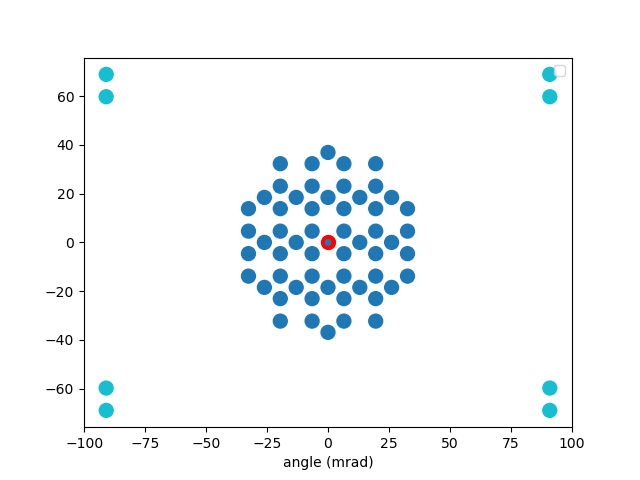

In [4]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
hkl_max = 15  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error
acceleration_voltage = 200.0 * 1000.0 #V
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'mistilt_alpha': np.radians(0),
        'acceleration_voltage':  acceleration_voltage}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)


## Plot Kikuchi Pattern
With the knowledge that the slope $m = \tan(\phi)$
we can plot the  perpendicular bisector of the line from origin to the Bragg peaks which are the Kikuchi lines.

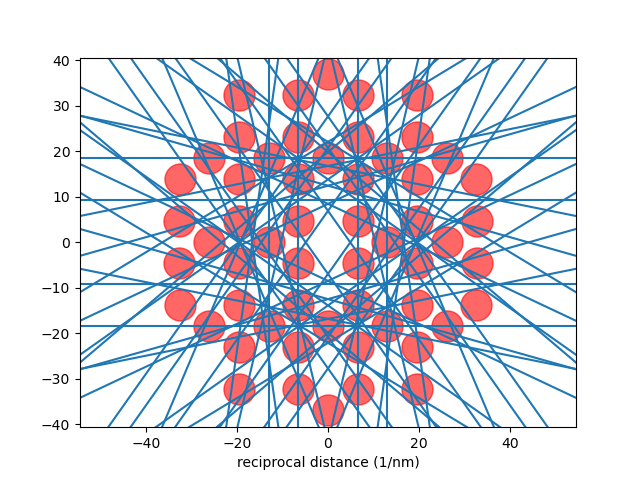

In [5]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']

r = diff_dict['allowed']['g'][ZOLZ, 0] * 1000  # now in mrad
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r * np.cos(phi+rotation)
y = r * np.sin(phi+rotation)
plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c= 'r')
for i, ph in enumerate(phi-np.pi/2): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph)))
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

### Plotting Coordinates Function
Or with a plotting coordinate function in which we can use the intensity derived from structure factors.

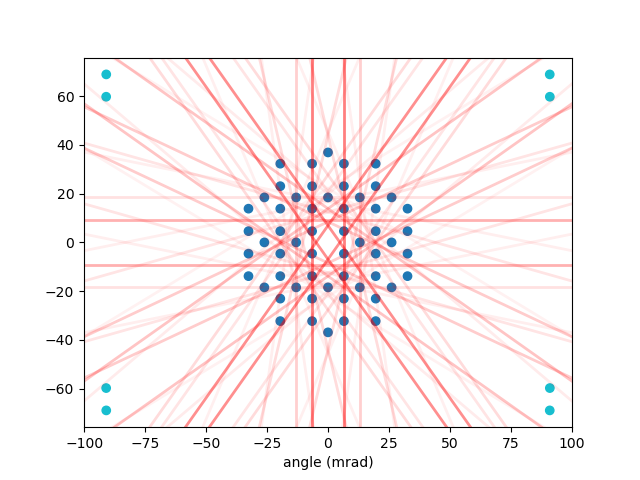

In [6]:
spots = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'])
kikuchi = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['Kikuchi']['g'], feature='line')

plt.figure()
plt.scatter(spots[:,0], spots[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'])
alpha =diff_dict['Kikuchi']['intensities']/ diff_dict['Kikuchi']['intensities'].max()*.5
for i, line in enumerate(kikuchi):
    plt.axline( (line[0], line[1]), slope=line[2], color='red',
                       alpha=alpha[i], linewidth=2)

plt.gca().set_aspect('equal')
plt.xlabel('angle (mrad)');



### With Mistilt and pyTEMlib

Change the mistit and observe the Laue circle open and close.

The Kikuchi pattern stays at the Laue circle center.

mistilt
Of the 156 possible reflection 43 are allowed.
Of those, there are 37 in ZOLZ  and 6 in HOLZ
Of the 65 forbidden reflection in ZOLZ  12 can be dynamically activated.


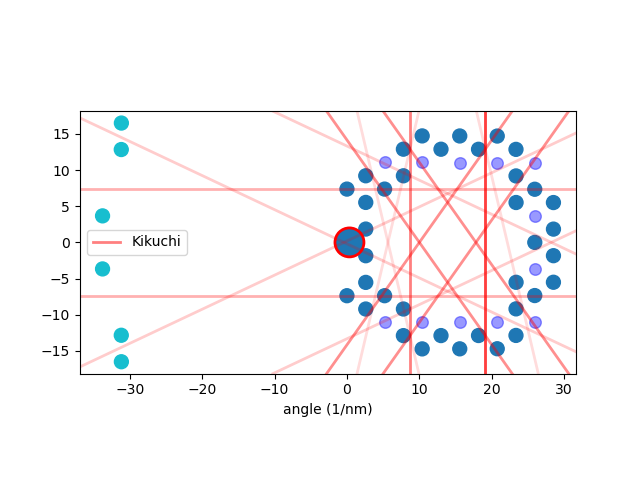

In [7]:
# --- Input ----------
mistilt_alpha = 2.0
mistilt_beta = 0.0

zone_hkl = np.array([1, 1, 0])
hkl_max = 15  #  maximum allowed Miller index
sg_max = 0.01   # 1/Ang  maximum allowed excitation error
acceleration_voltage = 200.0 * 1000.0 #V
# ------------------

tags = {'acceleration_voltage': acceleration_voltage,
        'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'mistilt_alpha': np.radians(mistilt_alpha),
        'mistilt_beta': np.radians(mistilt_beta),
        'Sg_max': sg_max}

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

diff_dict.setdefault('output',{})['plot_forbidden']=False
diff_dict['output']['plot_dynamically_allowed']=True
diff_dict['output']['plot_Kikuchi']=True
v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')


## Plot HOLZ Lines

Because, we calculated the $d\theta$ for all reflections, we do not need to do anything else for HOLZ lines and can directly plot them.

The HOLZ line parameters are stored in  the ** HOLZ** dictionary

Of the 716 possible reflection 136 are allowed.
Of those, there are 56 in ZOLZ  and 80 in HOLZ
Of the 98 forbidden reflection in ZOLZ  20 can be dynamically activated.


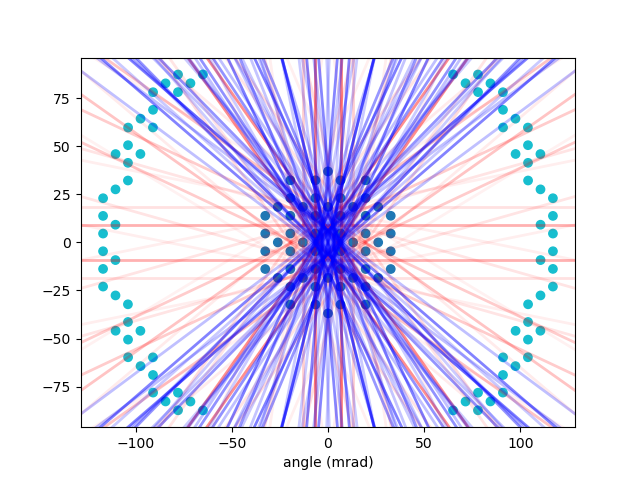

In [8]:
# --- Input ----------
mistilt_alpha = 0.0
mistilt_beta = 0.0

zone_hkl = np.array([1, 1, 0])
hkl_max = 20  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error
acceleration_voltage = 200.0 * 1000.0 #V
# ------------------

tags = {'acceleration_voltage': acceleration_voltage,
        'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'mistilt_alpha': np.radians(mistilt_alpha),
        'mistilt_beta': np.radians(mistilt_beta),
        'Sg_max': sg_max}

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
spots = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'])

kikuchi = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['Kikuchi']['g'], feature='line')
holz = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['HOLZ']['g_deficient'], feature='line')

plt.figure()
plt.scatter(spots[:,0], spots[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'])
alpha =diff_dict['Kikuchi']['intensities']/ diff_dict['Kikuchi']['intensities'].max()*.5
for i, line in enumerate(kikuchi):
    plt.axline( (line[0], line[1]), slope=line[2], color='red',
                       alpha=alpha[i], linewidth=2)
alpha =diff_dict['HOLZ']['intensities']/ diff_dict['HOLZ']['intensities'].max()*.5
for i, line in enumerate(holz):
    plt.axline( (line[0], line[1]), slope=line[2], color='blue',
                       alpha=alpha[i], linewidth=2)
plt.gca().set_aspect('equal')
plt.xlabel('angle (mrad)');


### With pyTEMlib
Change mistilt and maximum Miller indicex (hkl_max)

mistilt
Of the 280 possible reflection 49 are allowed.
Of those, there are 37 in ZOLZ  and 12 in HOLZ
Of the 65 forbidden reflection in ZOLZ  12 can be dynamically activated.


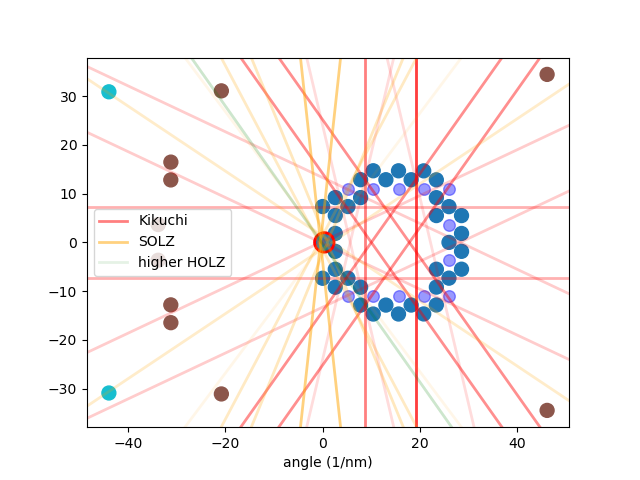

In [9]:
# --- Input ----------
mistilt_alpha = 2.0
mistilt_beta = 0.0

zone_hkl = np.array([1, 1, 0])
hkl_max = 20  #  maximum allowed Miller index
sg_max = 0.01   # 1/Ang  maximum allowed excitation error
acceleration_voltage = 200.0 * 1000.0 #V
# ------------------

tags = {'acceleration_voltage': acceleration_voltage,
        'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'mistilt_alpha': np.radians(mistilt_alpha),
        'mistilt_beta': np.radians(mistilt_beta),
        'Sg_max': sg_max}

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

diff_dict.setdefault('output',{})['plot_forbidden']=False
diff_dict['output']['plot_dynamically_allowed']=True
diff_dict['output']['plot_Kikuchi']=True
diff_dict['output']['plot_HOLZ']=True
v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')


### Comparison to Literature

Here we compare the calculation to a [-2,2,1] CBED pattern

Of the 192 possible reflection 36 are allowed.
Of those, there are 4 in ZOLZ  and 32 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


array([-10.524,   9.945,  -7.932,  11.105])

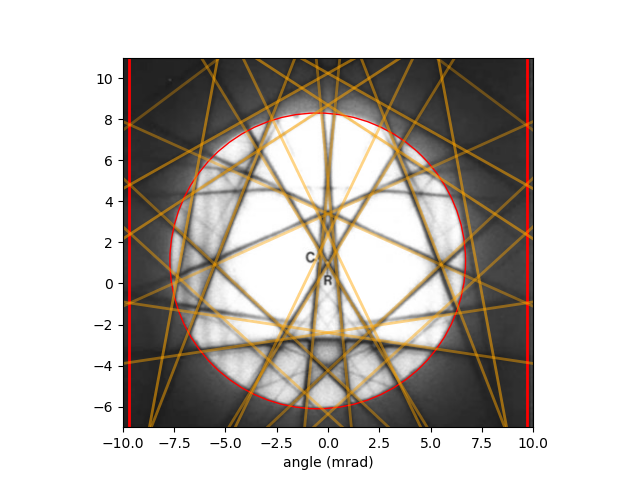

In [10]:
image = plt.imread('./Zuo-HOLZ-experiment.jpg')
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
tags = {'acceleration_voltage': 99.2 * 1000.0,  # V
      'convergence_angle': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 10}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

extent = np.array([-10.524,   9.945,  -7.932,  11.105])


spots = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'], rotation=-np.pi/2)
kikuchi = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['Kikuchi']['g'], feature='line', rotation=-np.pi/2)
holz = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['HOLZ']['g_deficient'], feature='line', rotation=-np.pi/2)

plt.figure()
plt.imshow(image, extent=extent)


plt.scatter(spots[:,0], spots[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'])
alpha =diff_dict['Kikuchi']['intensities']/ diff_dict['Kikuchi']['intensities'].max()*.5
for i, line in enumerate(kikuchi):
    plt.axline( (line[0], line[1]), slope=line[2], color='red',
                       alpha=1, linewidth=2)
alpha =diff_dict['HOLZ']['intensities']/ diff_dict['HOLZ']['intensities'].max()*.7
for i, line in enumerate(holz):
    plt.axline( (line[0], line[1]), slope=line[2], color='orange',
                       alpha=alpha[i], linewidth=2)
plt.gca().set_aspect('equal')
plt.xlabel('angle (mrad)');
plt.gca().set_xlim(-10, 10)
plt.gca().set_ylim(-7, 11)
#v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')
c = plt.Circle((-0.5,1.1),7.2, fill=False, edgecolor='red')
plt.gca().add_patch(c);
extent

## Calculation and Plotting with pyTEMlib
The parameters controlling the plotting output are defined in the 'output' subdictionory.

Default values are applied.

Of the 158 possible reflection 28 are allowed.
Of those, there are 4 in ZOLZ  and 24 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


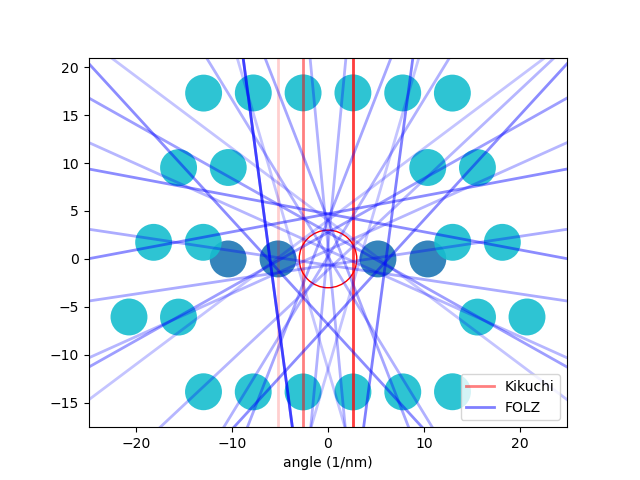

In [11]:
tags = {'acceleration_voltage': 99.2 * 1000.0,  # V
      'convergence_angle': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
plt.close('all')
diff_dict.setdefault('output',{})['plot_forbidden']=False
diff_dict['output']['plot_dynamically_allowed']=False
diff_dict['output']['plot_Kikuchi']=True
diff_dict['output']['plot_HOLZ']=True
diff_dict['output']['plot_rotation'] = -90
v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')

c = plt.Circle((0,0),3, fill=False, edgecolor='red')
plt.gca().add_patch(c)

## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.

Determination of Bragg reflections in polar coordinates allows for easy rotation in plane and calculation of Kikuchi and HOLZ lines.


## Appendix 

Of the 134 possible reflection 114 are allowed.
Of those, there are 18 in ZOLZ  and 96 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.
thickness 100


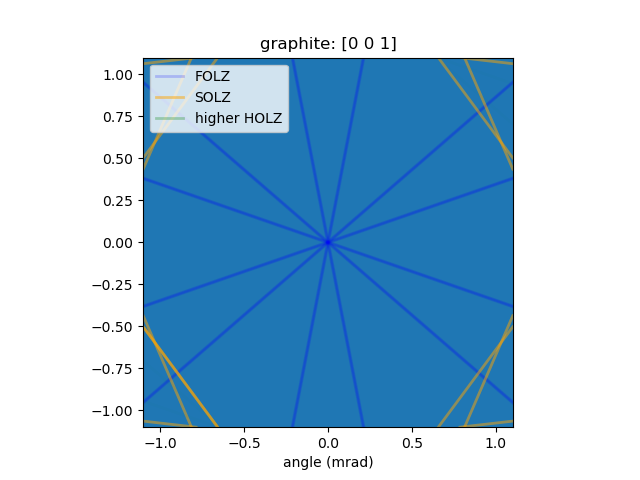

In [12]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO

# ----- Input -----------
crystal_name = 'graphite'
acceleration_voltage =  59.66 * 1000.0
# -----------------------

atoms = pyTEMlib.crystal_tools.structure_by_name(crystal_name)

tags = {'crystal_name': crystal_name,
        'acceleration_voltage': acceleration_voltage, #V
        'convergence_angle_mrad': 7.,
        'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
        'hkl_max': 9,   # Highest evaluated Miller indices
        'zone_hkl': np.array([0, 0, 1]),  
        'mistilt_alpha': .0,  # -45#-35-0.28-1+2.42
        'mistilt_beta': 0.,
        'thickness': 100,
        'plot_FOV': .5}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

diff_dict['output']=pyTEMlib.diffraction_tools.plot_holz_parameter()
diff_dict['output']['plot_reflections']=True
diff_dict['output']['plot_Kikuchi']=False
diff_dict['output']['linewidth_HOLZ'] = 2
diff_dict['output']['plot_HOLZ']=True

pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)

plt.title(crystal_name + ': ' + str(tags['zone_hkl']))
plt.gca().set_xlim(-1.1, 1.1)
plt.gca().set_ylim(-1.1, 1.1)

plt.gca().set_aspect('equal')